# What is Generalization ?

> ability to perform well on unseen data
> captures underlying pattern, not memorizing examples.
> goal: minimizing error on both training and test data
> underfitting -> model too simple
> overfitting -> model too complex

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
df = pd.read_csv('../DataSets/SalaryData.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
sc_exp = StandardScaler()
sc_sal = StandardScaler()

df['YearsExperience'] = sc_exp.fit_transform(df[['YearsExperience']])
df['Salary'] = sc_sal.fit_transform(df[['Salary']])

In [23]:
X = df[['YearsExperience']]
y = df[['Salary']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:

y_pred = model.predict(X_test)

In [27]:
print(model.intercept_)
print(model.coef_[0])

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

[-0.02261456]
[0.97553493]
0.9024461774180498
0.06858932896507035


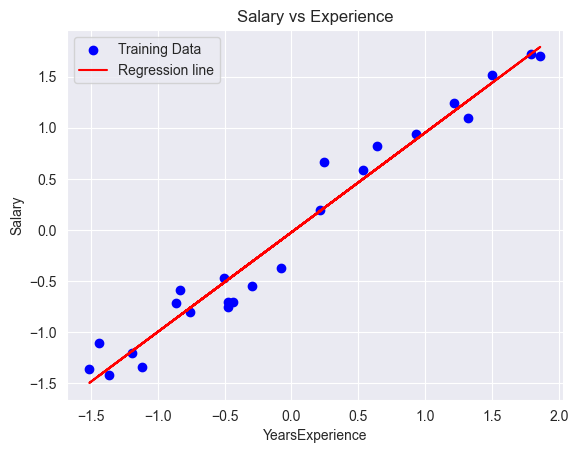

In [28]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.title('Salary vs Experience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [29]:
# code to find out salary for 5 year experience
exp = sc_exp.transform([[5]])
pred_salary = model.predict(exp)
actual_salary = sc_sal.inverse_transform(pred_salary)[0][0]
actual_salary

C:\Users\abhijit\PycharmProjects\INT234_SEM5\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\abhijit\PycharmProjects\INT234_SEM5\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(72440.6596269317)

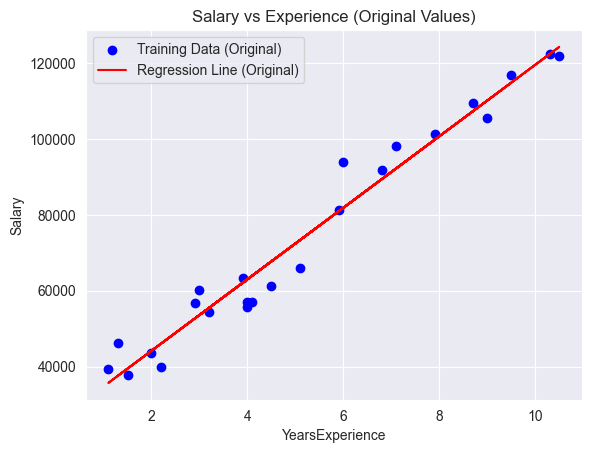

In [30]:
# Plot regression with original values
X_train_orig = sc_exp.inverse_transform(X_train)
y_train_orig = sc_sal.inverse_transform(y_train)
X_line = sc_exp.inverse_transform(X_train)
y_line = sc_sal.inverse_transform(model.predict(X_train))
plt.scatter(X_train_orig, y_train_orig, color='blue', label='Training Data (Original)')
plt.plot(X_line, y_line, color='red', label='Regression Line (Original)')
plt.title('Salary vs Experience (Original Values)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()